In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir("drive/My Drive/")

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)


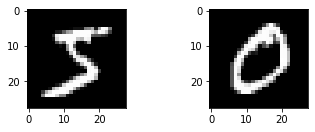

In [4]:
#Sample images from MNIST in grayscale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))

In [5]:
#Reshaping the array to 4D
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train = ', x_train.shape[0])
print('Number of images in x_test = ', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train =  60000
Number of images in x_test =  10000


In [6]:
#Converting class vectors to binary matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),metrics=['accuracy'])

In [8]:
hist = model.fit(x=x_train, y=y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 28s 460us/step - loss: 0.9789 - accuracy: 0.7408 - val_loss: 0.3772 - val_accuracy: 0.8995
Epoch 2/20
60000/60000 [==============================] - 28s 465us/step - loss: 0.3844 - accuracy: 0.8883 - val_loss: 0.2842 - val_accuracy: 0.9210
Epoch 3/20
60000/60000 [==============================] - 28s 465us/step - loss: 0.3142 - accuracy: 0.9082 - val_loss: 0.2421 - val_accuracy: 0.9301
Epoch 4/20
60000/60000 [==============================] - 27s 444us/step - loss: 0.2747 - accuracy: 0.9198 - val_loss: 0.2157 - val_accuracy: 0.9385
Epoch 5/20
60000/60000 [==============================] - 28s 475us/step - loss: 0.2457 - accuracy: 0.9270 - val_loss: 0.1966 - val_accuracy: 0.9428
Epoch 6/20
60000/60000 [==============================] - 27s 458us/step - loss: 0.2249 - accuracy: 0.9345 - val_loss: 0.1817 - val_accuracy: 0.9479
Epoch 7/20
60000/60000 [==============================] 

In [9]:
#Checking model
model.evaluate(x_test, y_test)
model_score = model.evaluate(x_test, y_test)
print('Test loss:', model_score[0])
print('Test accuracy:', model_score[1])

10000/10000 [==============================] - 2s 194us/step
Test loss: 0.09408148120753466
Test accuracy: 0.9718999862670898


The number predicted is :  9


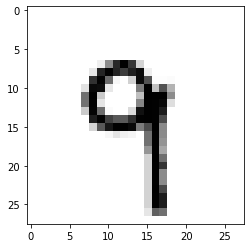

In [10]:
plt.imshow(x_test[1255].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[1255].reshape(1, 28, 28, 1))
print('The number predicted is : ', pred.argmax())

In [11]:
#Saving model
model.save('predict.model')
print('MODEL SAVED SUCESSFULLY')

MODEL SAVED SUCESSFULLY
